# HeartAttack prediction

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


Importing the dataset

In [2]:
import pandas as pd
heart=pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv')
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Checking the shape of DataFrame

In [3]:
print('Number of rows are',heart.shape[0], 'and number of columns are ',heart.shape[1])

Number of rows are 303 and number of columns are  14


Checking for null values

In [4]:
heart.isnull().sum()/len(heart)*100

age         0.0
sex         0.0
cp          0.0
trtbps      0.0
chol        0.0
fbs         0.0
restecg     0.0
thalachh    0.0
exng        0.0
oldpeak     0.0
slp         0.0
caa         0.0
thall       0.0
output      0.0
dtype: float64

No null values found

Checking For datatypes of the attributes

In [5]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


All attributes are of type 'int' except 'oldpeak' which is of type 'float'

Checking for duplicate rows

In [6]:
heart[heart.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


Removing the duplicates

In [7]:
heart.drop_duplicates(keep='first',inplace=True)

Checking new shape

In [8]:
print('Number of rows are',heart.shape[0], 'and number of columns are ',heart.shape[1])

Number of rows are 302 and number of columns are  14


Checking statistical data

In [9]:
heart.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Computing the correlation matrix

In [10]:
heart.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trtbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalachh,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exng,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


Number of people having sex as 0 are 96 and Number of people having sex as 1 are 206


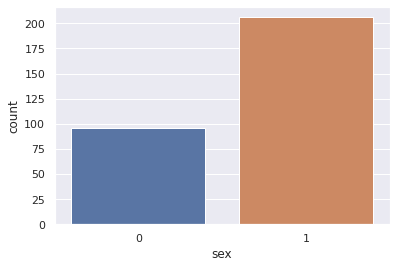

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
x=(heart.sex.value_counts())
print(f'Number of people having sex as 0 are {x[0]} and Number of people having sex as 1 are {x[1]}')
p = sns.countplot(data=heart, x="sex")
plt.show()

People having gender as 0 are more than twice the people having gender as 1

Breakdown for chest pain

0    143
2     86
1     50
3     23
Name: cp, dtype: int64


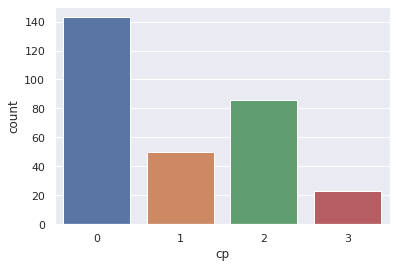

In [12]:
x=(heart.cp.value_counts())
print(x)
p = sns.countplot(data=heart, x="cp")
plt.show()

1. It can be observed people have chest pain of type 0 i.e 'Typical Angina' is the highest.
2. It can be observed people have chest pain of type 3 i.e 'Asymptomatic' is the lowest
3. It can also be observed people with chest pain of type 0 is almost 50% of all the people.

Breakdown of FBS

0    257
1     45
Name: fbs, dtype: int64


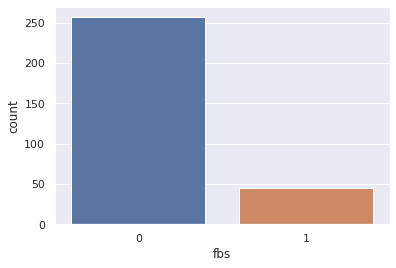

In [13]:
x=(heart.fbs.value_counts())
print(x)
p = sns.countplot(data=heart, x="fbs")
plt.show()

FBS with value 0 is significantly higher than value 1.

Breakdown of ECG

1    151
0    147
2      4
Name: restecg, dtype: int64


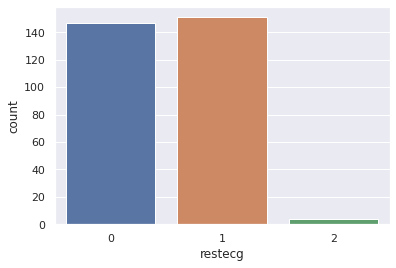

In [14]:
x=(heart.restecg.value_counts())
print(x)
p = sns.countplot(data=heart, x="restecg")
plt.show()

ECG count is almost the same for type 0 and 1. Also, for type 2 its almost negligible in comparision to type 0 and 1

Breakdown for Exercise Induced Angina

0    203
1     99
Name: exng, dtype: int64


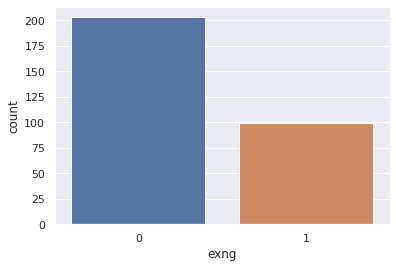

In [15]:
x=(heart.exng.value_counts())
print(x)
p = sns.countplot(data=heart, x="exng")
plt.show()

EXNG count is more than double for type 0

Breakdown for Thalium Stress Test

2    165
3    117
1     18
0      2
Name: thall, dtype: int64


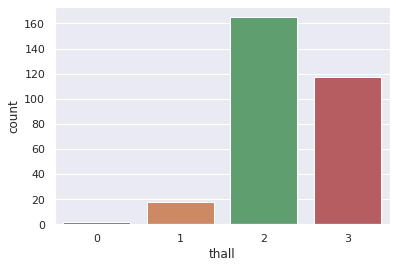

In [16]:
x=(heart.thall.value_counts())
print(x)
p = sns.countplot(data=heart, x="thall")
plt.show()

Thall count is max for type 2 and min for type 0

Density distribution for Age

<Figure size 720x720 with 0 Axes>

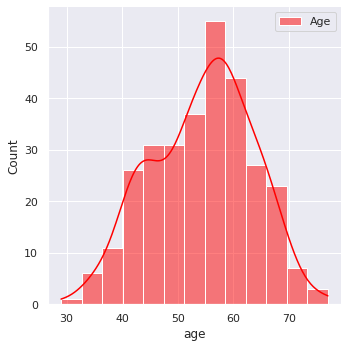

In [17]:
plt.figure(figsize=(10,10))
sns.displot(heart.age, color="red", label="Age", kde= True)
plt.legend()

Density distribution is highest for age group 55 to 60

trtbps vs count

<Figure size 1440x1440 with 0 Axes>

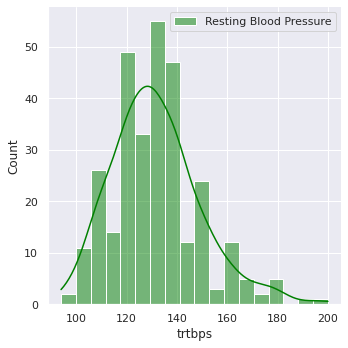

In [18]:
plt.figure(figsize=(20,20))
sns.displot(heart.trtbps , color="green", label="Resting Blood Pressure", kde= True)
plt.legend()

Trtbs has the highest count around 130

Heart Attack Vs Age

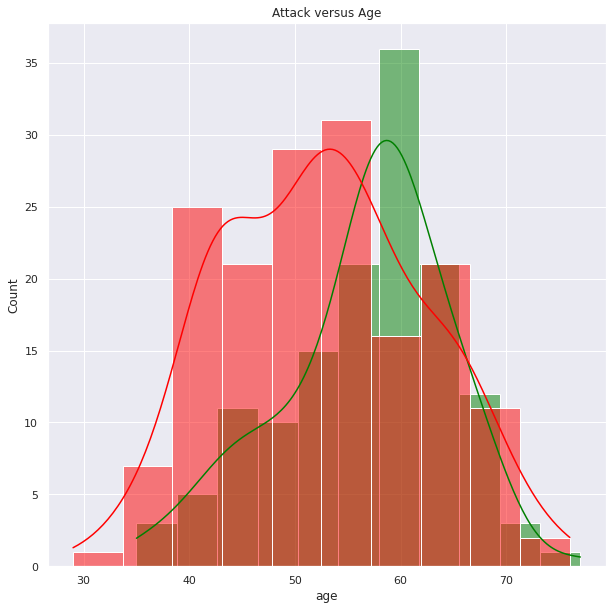

In [19]:
plt.figure(figsize=(10,10))
sns.histplot(heart[heart['output'] == 0]["age"], color='green',kde=True,) 
sns.histplot(heart[heart['output'] == 1]["age"], color='red',kde=True)
plt.title('Attack versus Age')
plt.show()

Cholestrol versus Age

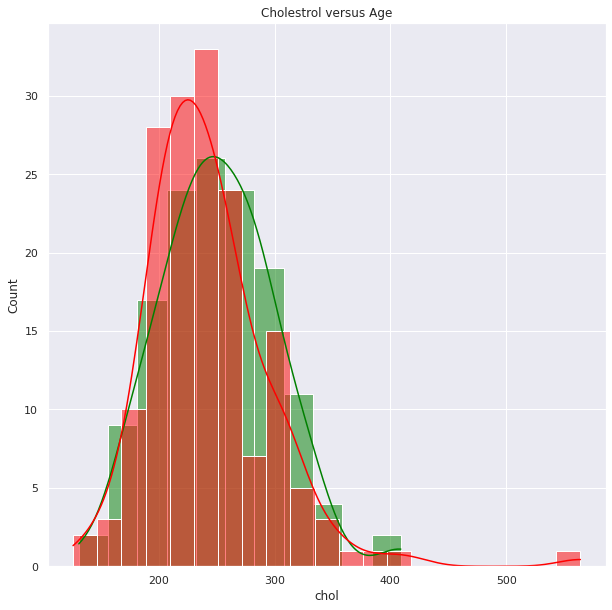

In [20]:
plt.figure(figsize=(10,10))
sns.histplot(heart[heart['output'] == 0]["chol"], color='green',kde=True,) 
sns.histplot(heart[heart['output'] == 1]["chol"], color='red',kde=True)
plt.title('Cholestrol versus Age')
plt.show()

Trtbs versus Age

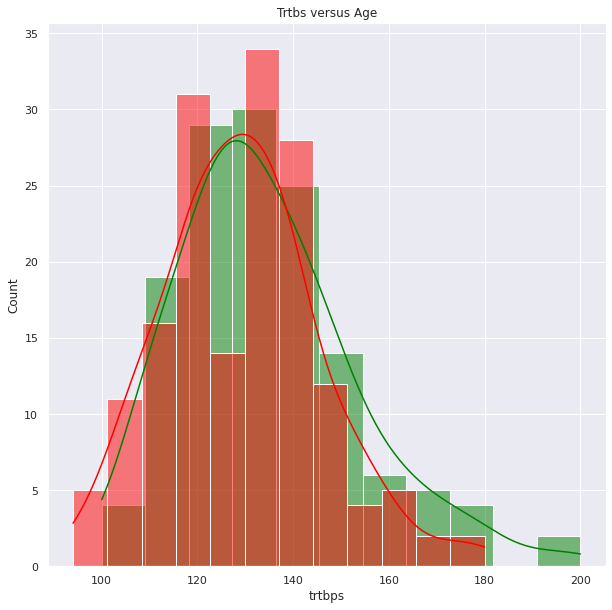

In [21]:
plt.figure(figsize=(10,10))
sns.histplot(heart[heart['output'] == 0]["trtbps"], color='green',kde=True,) 
sns.histplot(heart[heart['output'] == 1]["trtbps"], color='red',kde=True)
plt.title('Trtbs versus Age')
plt.show()

Thalachh versus Age

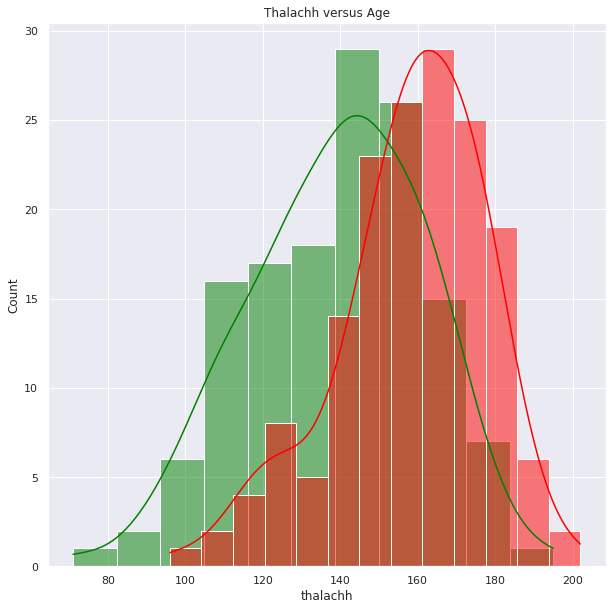

In [22]:
plt.figure(figsize=(10,10))
sns.histplot(heart[heart['output'] == 0]["thalachh"], color='green',kde=True,) 
sns.histplot(heart[heart['output'] == 1]["thalachh"], color='red',kde=True)
plt.title('Thalachh versus Age')
plt.show()

Pair Plot

<Figure size 1440x1440 with 0 Axes>

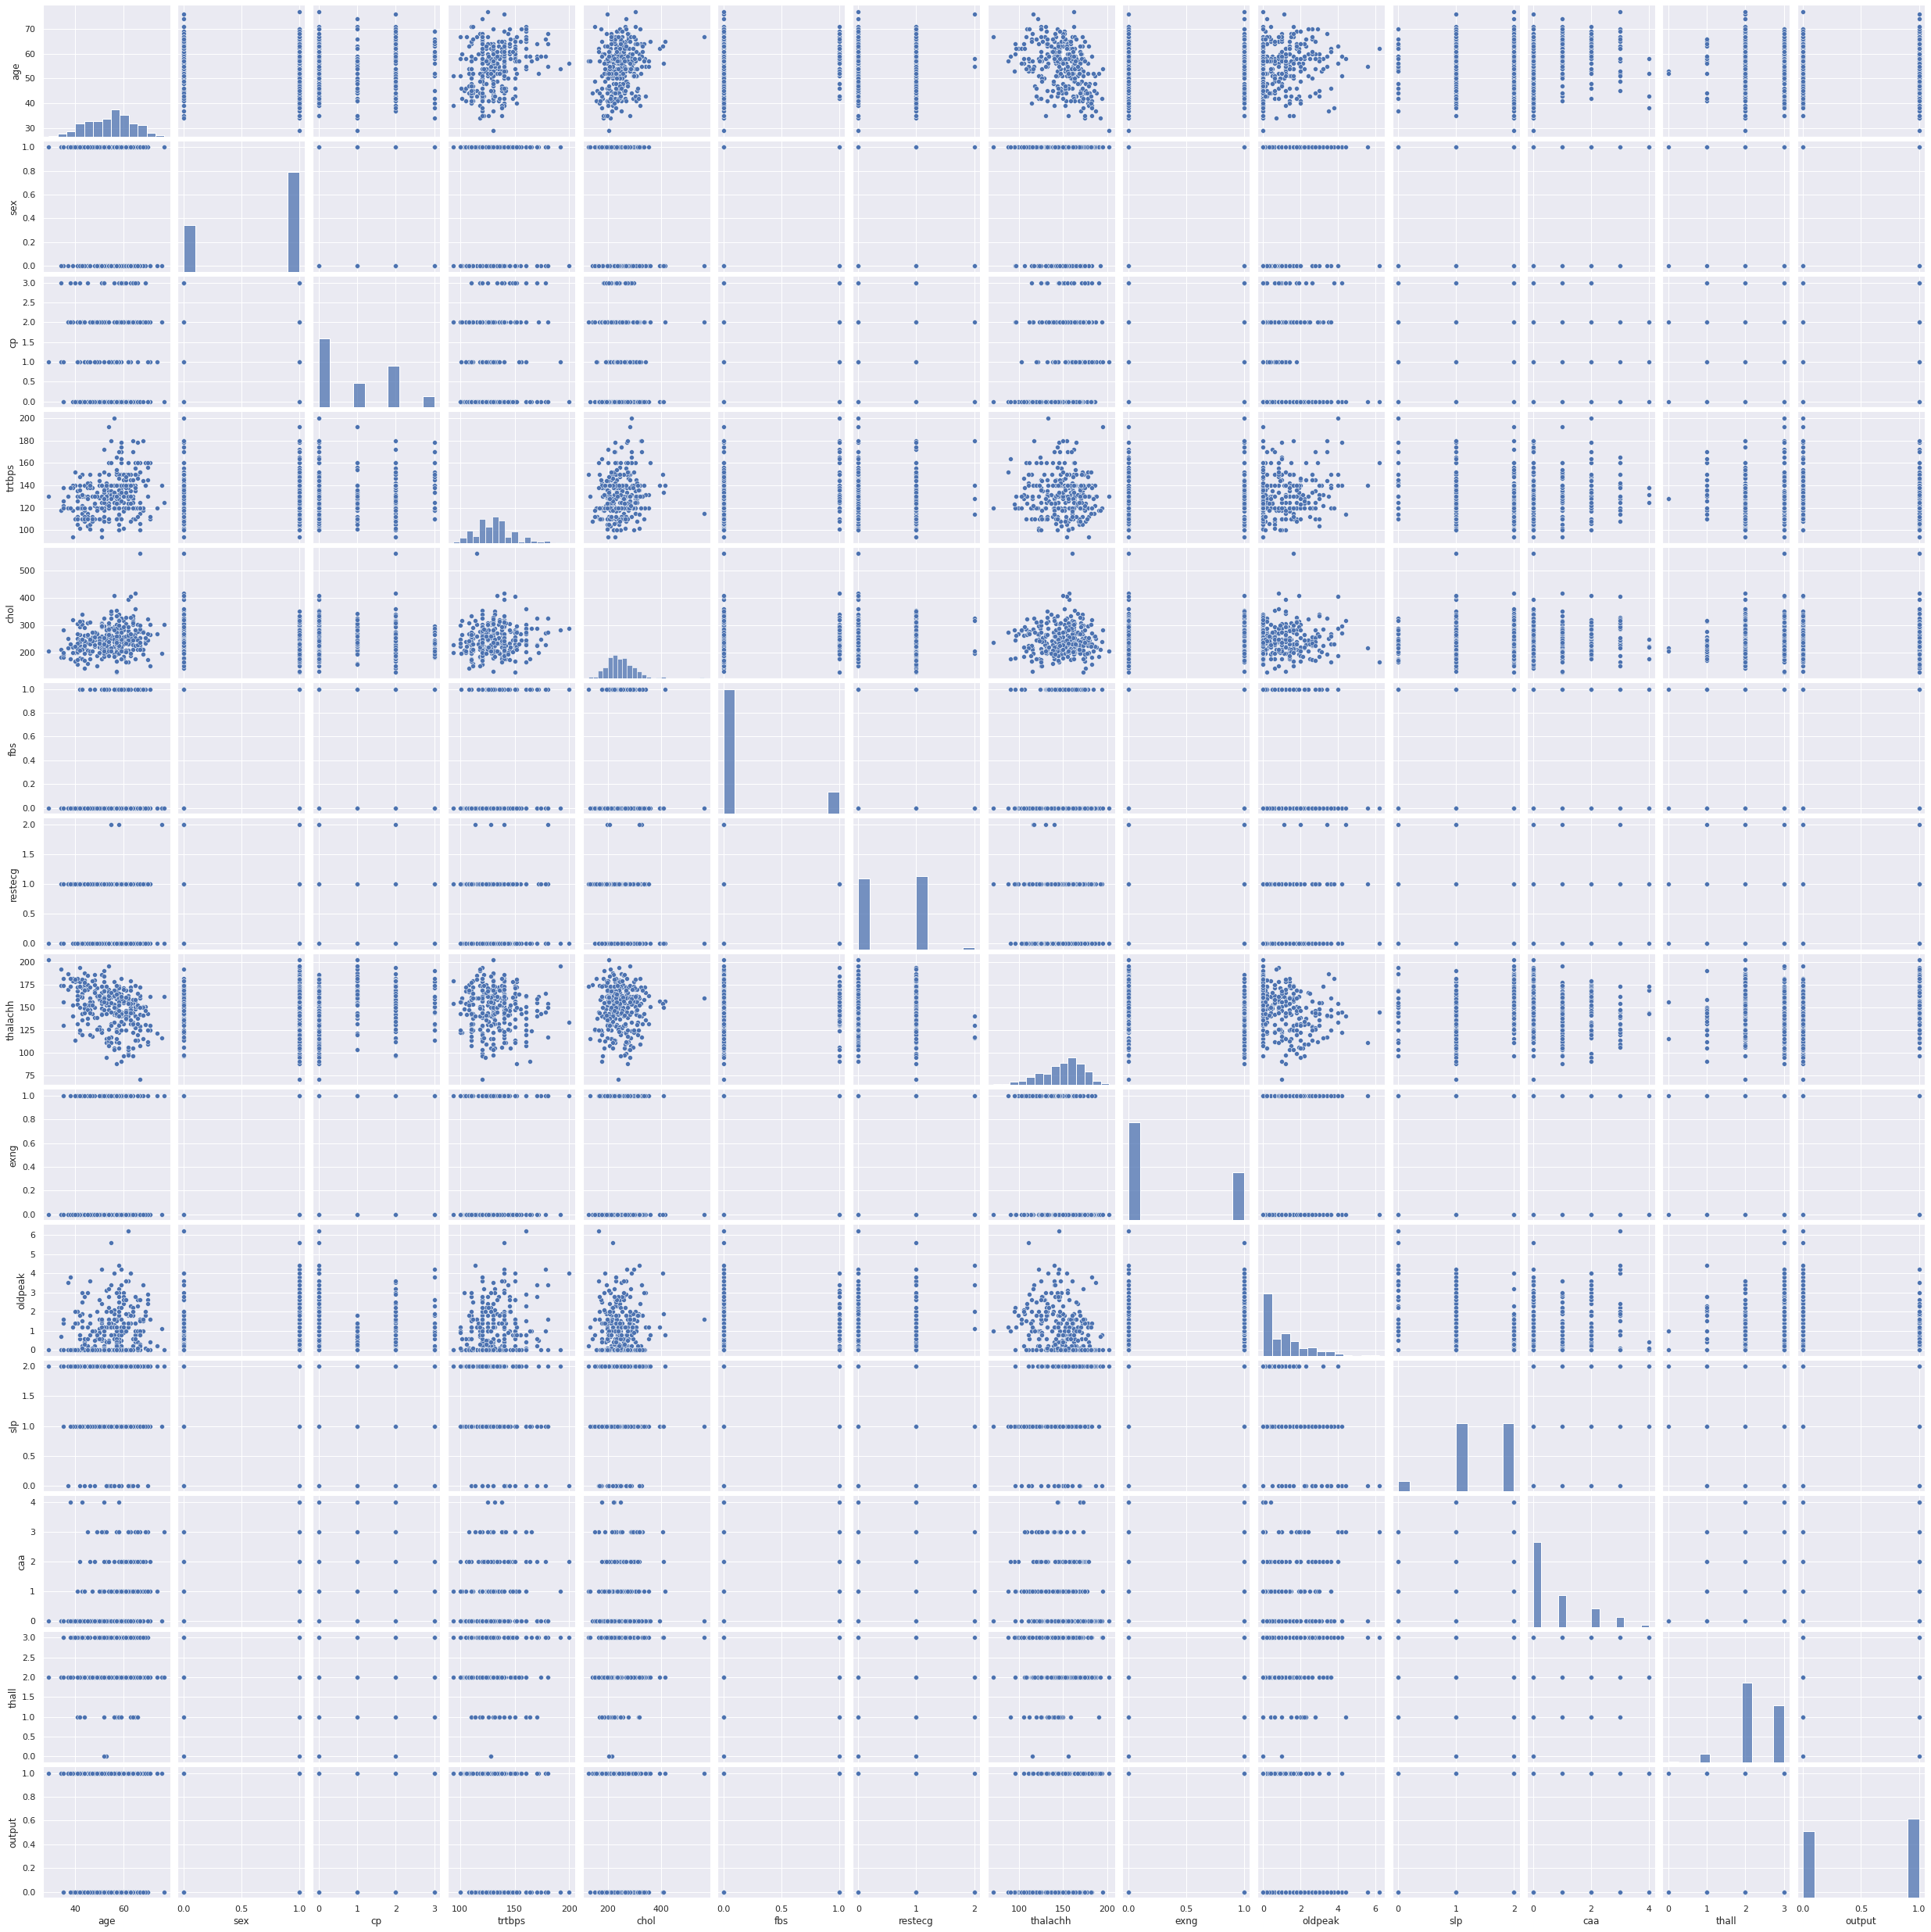

In [23]:
plt.figure(figsize=(20,20))
sns.pairplot(heart)
plt.show()

****Data preprocessing****

In [24]:
x = heart.iloc[:, 1:-1].values
y = heart.iloc[:, -1].values
print(x.shape)
print(y.shape)

(302, 12)
(302,)


Splitting the dataset into training and testing data

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 100)

Feature Scaling

In [26]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [27]:
print(x_train.shape)
print(x_test.shape)

(241, 12)
(61, 12)


Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(x_train, y_train)
predicted=model.predict(x_test)
conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)
print()
print()
print ("The accuracy of Logistic Regression is : ", accuracy_score(y_test, predicted)*100, "%")

Confusion Matrix : 
 [[27  8]
 [ 2 24]]


The accuracy of Logistic Regression is :  83.60655737704919 %
